In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [99]:
df = pd.read_csv("cleaned_data.csv")
numerical_df = df.select_dtypes(include='number').drop(['price', 'id'], axis=1)
non_categorical = numerical_df.columns.to_list() + ['price', 'id']
categorical_df = df.drop(non_categorical, axis=1)

Another idea instead of label encoder is to use one hot encoding that is not based on ordering and might improved the scores. 

In [103]:
labelencoder = LabelEncoder()
for col in categorical_df:
    categorical_df[col] = labelencoder.fit_transform(categorical_df[col])
    
x = numerical_df.join(categorical_df)
y = df['price']

In [104]:
x.columns

Index(['ranking_score', 'agent_id', 'sq_meters', 'year_of_construction',
       'floor', 'rooms', 'no_of_bathrooms', 'no_of_wc', 'living_rooms',
       'kitchens', 'balcony_area', 'geography_name', 'subtype', 'ad_type',
       'lux_home', 'new_development', 'garage', 'furnished', 'preserved',
       'investment', 'unfinished', 'heating_under_floor', 'renovated',
       'requires_renovation', 'airy', 'bright', 'painted', 'garden', 'ac',
       'storage', 'balcony', 'internal_stairs', 'view', 'secure_door',
       'penthouse', 'alarm', 'corner', 'holiday_home', 'student_home',
       'night_power', 'neoclassic', 'double_glass', 'for_commercial_use',
       'fireplace', 'elevator', 'satellite', 'solar_heater', 'attic', 'pool',
       'playroom'],
      dtype='object')

In [105]:
rf = RandomForestRegressor()
rf = rf.fit(x, y)
scores = cross_val_score(rf, x, y, cv=5, scoring='r2')
scores.mean()

0.6000125067993285

In [19]:
importance = sorted(zip(x.columns, bestF.feature_importances_), key=lambda k: k[1], reverse=True)[:10]
for col, v in importance:
    if v == 0:
        continue
    print(col,v)

sq_meters 0.6347029387537368
year_of_construction 0.09543010172258684
geography_name 0.03775723179193718
floor 0.02977608750106865
ranking_score 0.020283418836584563
rooms 0.017220393879783136
agent_id 0.017050102748104725
no_of_wc 0.013961031251900133
subtype 0.012078447508467711
no_of_bathrooms 0.011896539231994735


In [109]:
n_estimators = [150, 200]
max_depth = [10, 15]
min_samples_split = [2, 5]
min_samples_leaf = [2, 4] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rf = RandomForestRegressor()
gridF = GridSearchCV(rf, hyperF, verbose = 1, n_jobs = -1, cv=5, scoring='r2')
gridF.fit(x, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200]},
             scoring='r2', verbose=1)

In [110]:
gridF.best_score_

0.6141888130266582

In [111]:
gridF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [85]:
importance = sorted(zip(x.columns, bestF.best_estimator_.feature_importances_), key=lambda k: k[1], reverse=True)[:10]
for col, v in importance:
    if v == 0:
        continue
    print(col,v)

agent_id 0.7684522725207348
ranking_score 0.2081973412383902
balcony_area 0.002839231822460844
year_of_construction 0.001752828678042224
renovated 0.0015555109952059428
no_of_wc 0.0015447067083546283
price 0.0015008123179712173
no_of_bathrooms 0.0014551320840252063
rooms 0.001124166764977614
kitchens 0.001090212844925019


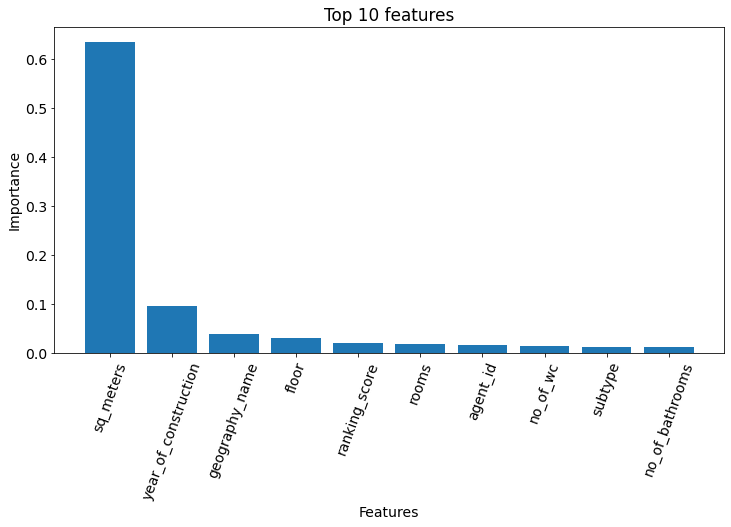

In [43]:
plt.bar(range(1, len(importance)+1), [imp for col, imp in importance])
plt.title('Top 10 features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(np.arange(1, 11), labels=[col for col, _ in importance], rotation=70, fontsize=14)
plt.show();

In [71]:
y = df['price']
scaler = MinMaxScaler()
scaled = scaler.fit(numerical_df)
scaled = scaler.transform(numerical_df)

scaled_features_df = pd.DataFrame(scaled, index=numerical_df.index, columns=numerical_df.columns).join(categorical_df)
scaled_features_df.head(10)

,ranking_score,agent_id,sq_meters,year_of_construction,floor,rooms,no_of_bathrooms,no_of_wc,living_rooms,kitchens,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,0.185851,0.619899,0.100580,0.867958,0.937353,0.015686,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.711631,0.678442,0.114172,0.856514,0.949475,0.019608,0.190476,0.045455,0.016667,0.090909,...,1,2,1,2,2,1,1,2,1,2
2,0.329736,0.272844,0.055817,0.871479,0.569832,0.007843,0.095238,0.045455,0.000000,0.000000,...,0,0,0,2,0,0,0,0,0,0
3,0.635492,0.620041,0.015042,0.869718,0.577756,0.011765,0.047619,0.045455,0.000000,0.090909,...,1,2,1,2,2,1,1,1,1,1
4,0.663669,0.620041,0.033164,0.869718,0.578001,0.015686,0.047619,0.090909,0.000000,0.090909,...,1,2,1,2,2,1,1,1,1,2
5,0.706235,0.620041,0.055455,0.873239,0.586041,0.023529,0.238095,0.045455,0.000000,0.272727,...,1,2,1,2,1,1,1,1,1,1
6,0.602518,0.208675,0.050562,0.872359,0.162427,0.011765,0.095238,0.045455,0.016667,0.090909,...,1,1,1,2,2,1,1,1,1,2
7,0.755396,0.571968,0.061254,0.857394,0.950480,0.019608,0.142857,0.090909,0.000000,0.090909,...,1,2,1,2,2,1,2,2,1,1
8,0.830336,0.152909,0.070315,0.870599,0.170780,0.023529,0.190476,0.045455,0.033333,0.181818,...,1,2,1,2,2,2,2,2,2,2
9,0.070743,0.396624,0.103480,1.000000,0.952571,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
